# Project: Identify factors important to predicting if a patient will show for an appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline 


# We are trying to identify the important factors which impact a patient coming for a patient coming to the hospital.

# The factors I plan to analyze are - 

## Does age have an impact on the percentage of patients having a No No-show status? 

## Days to Appointment (Appointment Day - Scheduled Day) impact on number of patients with a No No-show status. If days to appointment are high do the patients don't go for the appointment? 

## Does having enrolled in Brasilian welfare program have an impact on the percentage of    patients having a No No-Show status (Mean and chi square test)

## Do patients with hypertension tend to have more No No-show status than the patients with no Hypertension? 
 
## Are having hypertension and going for an appointment related? (Mean and Chi Square test)

<a id='wrangling'></a>
## Data Wrangling


In [3]:
# Importing the dataset 

import pandas as pd 
import numpy as np
import time
import datetime 
from datetime import date


df = pd.read_csv('KaggleV2_May_2016.csv', sep='\s*,\s*',
                           header=0, encoding='ascii', engine='python')


df = df.sort_values('Age')
print(df.head(n=3))

# Now we can observe that there is 1 entry with age as negative which we should remove from our dataset as age being 
# negative makes no sense

df = df[df.Age != -1]
cnt=df.count # Checking if number of rows has reduced or not (It has reduced from 110,527 to 110,526)

# Now for observing the impact of days to appointment on the Percentage of patients going for appoitment we will 
# need the difference between Appointment day and Scheduled day 

# Converting Scheduled Day and Appointment Day into exact days

df['Scheduled_Day'] = df['ScheduledDay'].str[:10]
df['Appointment_Day']=df['AppointmentDay'].str[:10]

# Now calculating the difference between Appointment Date and Scheduled Date 

df['Scheduled_Day_new'] =  pd.to_datetime(df['Scheduled_Day'])

df['Appointment_Day_new'] =  pd.to_datetime(df['Appointment_Day'])

df['diff']=df['Appointment_Day_new']-df['Scheduled_Day_new']

# Now let's check if there are any negative values in the difference column 

df = df.sort_values('diff')
print(df.head(n=6))

#Converting timedelta object to int object 

df['diff'] = (df['diff'] / np.timedelta64(1, 'D')).astype(int)

x = df['diff'].dtype
print(x)

# We observe here that there are 5 values with negative differences, let's go ahead and remove them 

df2 = df[df['diff']>=0]
cnt = df2.count
print(cnt)

# Now for analyzing the variation of age and day diff, I will be creating bins for Age and Day Diff and calculating 
# the percentage of No no Shows for each bin 

bins_age = [0,10,20,30,40,50,60,70,80,90,100,110,120]
labels_age = ["0-10","10-20","20-30","30-40","40-50","50-60","60-70","70-80","80-90","90-100","100-110","110-120"]
df2['binned_age'] = pd.cut(df2['Age'], bins=bins_age, labels=labels_age, right=False)
#df2.to_csv('check.csv',sep=',')
print(df2.head())

#Creating bins for Date Diff

bins_diff = [0,20,40,60,80,100,120,140,160,180]
labels_diff = ["0-20","20-40","40-60","60-80","80-100","100-120","120-140","140-160","160-180"]
df2['binned_diff'] = pd.cut(df2['diff'], bins=bins_diff, labels=labels_diff, right=False)
df2.to_csv('check.csv',sep=',')
print(df2.head())

# I used right = False since I want to include the lower range and exclude the higher range 
# Data is ready for analysis








           PatientId  AppointmentID Gender          ScheduledDay  \
99832   4.659430e+14        5775010      F  2016-06-06T08:58:13Z   
34218   3.469430e+12        5649465      F  2016-05-03T06:57:26Z   
102834  4.882675e+10        5659726      F  2016-05-04T14:35:59Z   

              AppointmentDay  Age Neighbourhood  Scholarship  Hypertension  \
99832   2016-06-06T00:00:00Z   -1         ROMÃO            0             0   
34218   2016-05-09T00:00:00Z    0      REDENÇÃO            0             0   
102834  2016-06-01T00:00:00Z    0       MARUÍPE            0             0   

        Diabetes  Alcoholism  Handcap  SMS_received No-show  
99832          0           0        0             0      No  
34218          0           0        0             0     Yes  
102834         0           0        0             1      No  
          PatientId  AppointmentID Gender          ScheduledDay  \
71533  9.982320e+14        5686628      F  2016-05-11T13:49:20Z   
72362  3.787480e+12        56556

C:\Users\kumara3r\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel\__main__.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\kumara3r\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel\__main__.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


          PatientId  AppointmentID Gender          ScheduledDay  \
80070  3.279390e+11        5646636      F  2016-05-02T11:34:09Z   
84007  7.363567e+10        5677342      F  2016-05-10T07:06:41Z   
89035  8.733930e+14        5782960      F  2016-06-07T12:53:58Z   
83858  2.459300e+14        5699052      F  2016-05-16T08:07:51Z   
2500   5.589980e+14        5642211      M  2016-04-29T15:20:47Z   

             AppointmentDay  Age    Neighbourhood  Scholarship  Hypertension  \
80070  2016-05-02T00:00:00Z   24   JARDIM CAMBURI            0             0   
84007  2016-05-10T00:00:00Z   24       TABUAZEIRO            0             0   
89035  2016-06-07T00:00:00Z   56        SÃO PEDRO            0             1   
83858  2016-05-16T00:00:00Z   24       TABUAZEIRO            0             0   
2500   2016-04-29T00:00:00Z   56  JARDIM DA PENHA            0             0   

       Diabetes  Alcoholism  Handcap  SMS_received No-show Scheduled_Day  \
80070         0           0        0    

### Data Cleaning Key Findings

## 1. Found 1 negative value for age which was removed from the analysis 

## 2. Found 5 entries with Appointment Day before Scheduled Day which is not possible hence they were removed from the analysis 

## 3. Created diff (Appointment Day - Scheduled Day) variable to test hypothesis 

## 4. Created Age Bins and Diff bins to test hypothesis 1 and 2. 

<a id='eda'></a>
## Exploratory Data Analysis


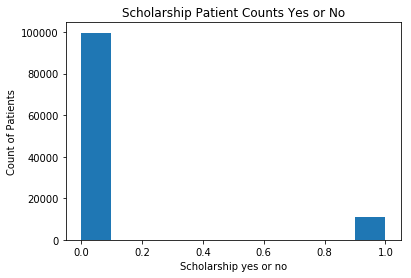

In [32]:
# Before looking at 2-D variables let's try and look at the distribution of some variables we will be analyzing 
# in our hypothesis using histograms

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = df2['Scholarship']

plt.hist(x)
plt.ylabel('Count of Patients');
plt.xlabel('Scholarship yes or no');
plt.title('Scholarship Patient Counts Yes or No');



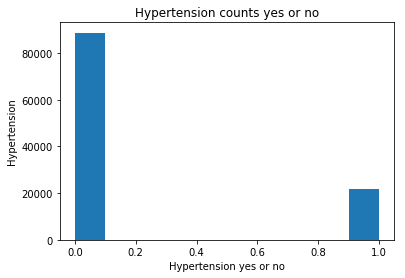

In [29]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

y = df2['Hypertension']

plt.hist(y)
plt.ylabel('Count of Patients');
plt.xlabel('Hypertension yes or no');
plt.title('Hypertension Patient counts yes or no');

## We can infer from these histograms that number of patients having enrolled in Scholarship or having hypertension are very less as compared to patients not having scholarship or hypertension

83.2549282436
77.6423935507


[Text(0,0.5,'No_Percentage'), Text(0.5,0,'binned_age')]

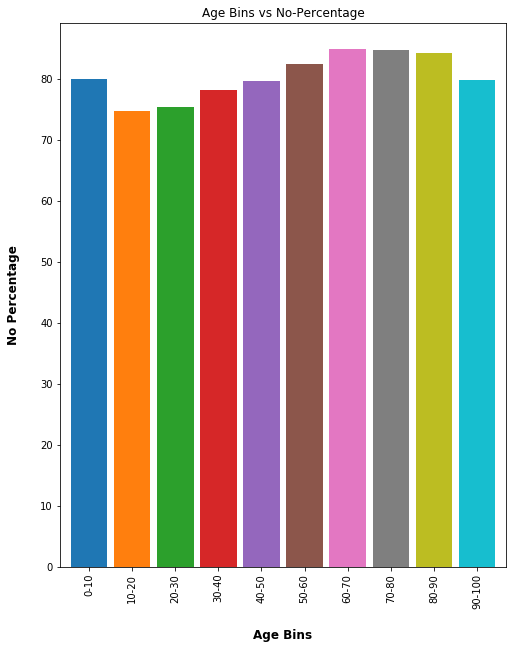

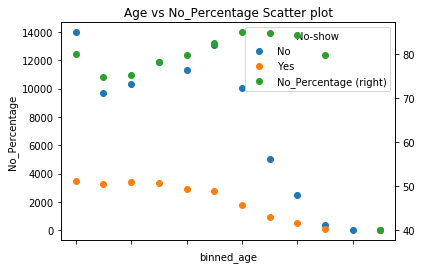

In [35]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# First Hypothesis I am going to test is if increasing age has an impact on the percentage of No No-Show Percentage

# For this, I plan to count the number of No, Yes cases by Age bucket and plot the No No-show percentage over Age buckets 

# Let's create a dataset with Age Buckets, Count of No No-show, Yes No-show, and Percentage of No No-Show 

df2.head()

df3 = df2.groupby(['binned_age',"No-show"])['PatientId'].count()
df3.head()

df4 = df3.unstack()
df4.head()

df4['No_Percentage'] = (df4['No']/(df4['No']+df4['Yes']))*100
df4.head()
df4.to_csv('check.csv',sep=',')

# Now we see than 100-110 and 110-120 have very few entries so let's not consider them in the analysis

df5 = df4.head(10)
df5.to_csv('check2.csv',sep=',')

# Now that we have created this dataset let's create a bar chart for the same 

import matplotlib.pyplot as plt
ax = df5['No_Percentage'].plot(kind='bar', figsize=(8, 10), zorder=2, width=0.85,title="Age Bins vs No-Percentage")
ax.set_xlabel("Age Bins", labelpad=20, weight='bold', size=12)
ax.set_ylabel("No Percentage", labelpad=20, weight='bold', size=12)

# In the below bar graph we observe there is a clear increase in the No No-show percentage as the age increases. 

# Let's check it by calculating and comparing the average No No-Show percentage of two age buckets 0-50 and 50-100 
# Let's create two datasets for the same 

dflowage = df5.head(5)
dflowage.head()

dfhighage=df5.tail(5)
dfhighage.head()

print(dfhighage['No_Percentage'].mean())
print(dflowage['No_Percentage'].mean())

# Let's also check this trend using a scatter plot

ax = df4.plot(marker='o', linewidth=0, secondary_y='No_Percentage',title="Age vs No_Percentage Scatter plot")
ax.set(xlabel='binned_age',ylabel='No_Percentage')




# Conclusion 1: 

## We observe that the Mean of No No-Show percentage for the age bucket 50-100 is 83.25 and for the age bucket 0-50 is 77.64, a pretty big difference

## Hence we can conclude that as age of the patient increases, No No-show Percentage also tends to increase which is evident from the bar plot 

## We can see from the scatter plot also, that there is an increasing trend of No No-show percentage as age increases 

67.5828092243
71.56054868


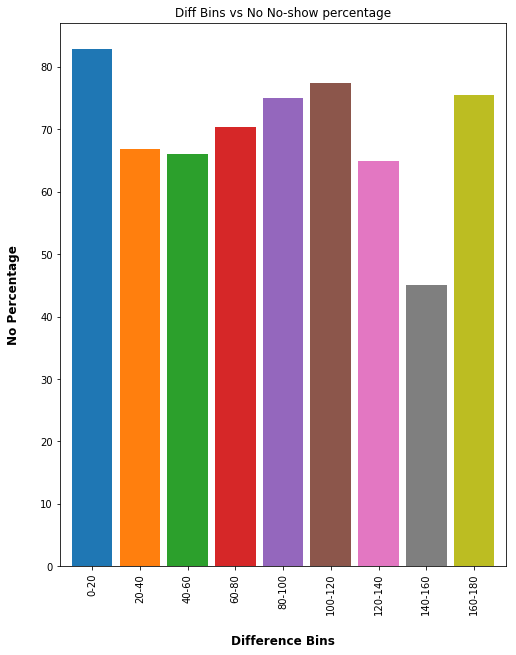

In [36]:
# Second hypothesis I want to test is if increasing the days to appointment from Scheduled day has a negative impact
# on Percentage of No No-show percentage 

# Let's create a dataset with Diff Buckets, Count of No No-show, Yes No-show, and Percentage of No No-Show 

df6 = df2.groupby(['binned_diff',"No-show"])['PatientId'].count()
df6.head()

df7 = df6.unstack()
df7.head()

df7['No_Percentage'] = (df7['No']/(df7['No']+df7['Yes']))*100
df7.head()
df7.to_csv('df7.csv',sep=',')

# Now that we have created this dataset let's create a bar chart for the same 

import matplotlib.pyplot as plt
ax = df7['No_Percentage'].plot(kind='bar', figsize=(8, 10), zorder=2, width=0.85,title='Diff Bins vs No No-show percentage')
ax.set_xlabel("Difference Bins", labelpad=20, weight='bold', size=12)
ax.set_ylabel("No Percentage", labelpad=20, weight='bold', size=12)

# In the below bar graph we observe there is a clear decrease in the No No-show percentage as the day difference 
# increases between Appointment Day and Scheduled Day

# Let's check it by calculating and comparing the average No No-show percentage of two diff buckets 0-80 and 80-180 
# Let's create two datasets for the same 

dflowdiff = df7.head(4)
dflowdiff.head()

dfhighdiff=df7.tail(5)
dfhighdiff.head()

print(dfhighdiff['No_Percentage'].mean())
print(dflowdiff['No_Percentage'].mean())


# We observe that the Mean of No No-Show percentage for the Diff bucket 0-80 is 71.56 and for the diff bucket 
# 80-180 is  67.58
# Hence we can conclude that as difference between Appointment and Scheduled Day No No-show Percentage decreases





# Conclusion 2: 

## We observe that the Mean of No No-Show percentage for the Diff bucket 0-80 is 71.56 and for the diff bucket 80-180 is 67.58

## Hence we can conclude that as difference between Appointment and Scheduled Day increases No No-show Percentage decreases (less patients tend to go for their appointment when appointment day is far from scheduled day)- bar plot shows a dip in the farther diff buckets

Scholarship  No-show       
1            No_Percentage     76.263696
             Yes_Percentage    23.736304
dtype: float64


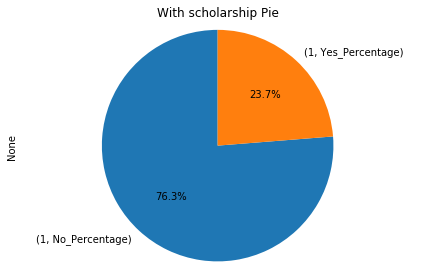

In [24]:
# Third hypothesis I want to test is if There is a relationship between scholarship and percentage of No no-show 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats 

# Let's try to find out the No no-show percentage for patients with and patient without scholarship 

crosstab_scholarship = pd.crosstab(df2['Scholarship'],df2['No-show'])

crosstab_scholarship['No_Percentage'] = (crosstab_scholarship['No']/(crosstab_scholarship['No']+crosstab_scholarship['Yes']))*100
crosstab_scholarship['Yes_Percentage'] = 100 - crosstab_scholarship['No_Percentage']
a = crosstab_scholarship.stack()


# We can see that Percentage of No No show is higher for patients with no scholarship, which may imply that 
# patients with scholarships tend to show less for an appointment
# Let's use chi square test to see if having a scholarship is related to No-show percentage
# Our null hypothesis is that scholarship and No-show percentage are independent 

crosstab_chi = pd.crosstab(df2['Scholarship'],df2['No-show'])
stats.chi2_contingency(crosstab_chi)

# The first value is chi-square, followed by p value, degrees of freedom and the expected frequencies 
# We can reject the null hypothesis as the p value is less than 0.05 
# This indicates that there is a relationship between being in scholarship program and tendency to go for an appointment

# Now let's check the percentage of No No-show for Yes and No Scholarship using a pie chart 

no_scholarship = a.head(4)
print(no_scholarship)

no_scholarship = no_scholarship.tail(2)
print(no_scholarship)

no_scholarship.plot.pie(y=no_scholarship.index,
           shadow=False,
           startangle=90,
          autopct='%1.1f%%',title='Without scholarship Pie')

plt.axis('equal')
plt.tight_layout()
plt.show()

yes_scholarship = a.tail(4)
print(yes_scholarship)

yes_scholarship = yes_scholarship.tail(2)
print(yes_scholarship)

yes_scholarship.plot.pie(y=yes_scholarship.index,
           shadow=False,
           startangle=90,
           autopct='%1.1f%%',title='With scholarship Pie')

plt.axis('equal')
plt.tight_layout()
plt.show()



# Conclusion 3: 

## We see that lower percentage of patients with a scholarship show for an appointment than the ones without a scholarship, this may implay that patients with scholarships tend to show less for an appointment 

## Performing chi-square test proves that there is indeed a relationship between having a scholarship and tendency to go for an appointment

## We can see through the pie chart that the percentage of No No-show patients is higher for patients with no scholarship which may imply that patients with scholarships tend to show less for an appointment

In [38]:
# Foruth hypothesis I want to test is if There is a relationship between Hypertension and percentage of no no-show 


import numpy as np
import pandas as pd

from scipy import stats 

crosstab_Hypertension = pd.crosstab(df2['Hypertension'],df2['No-show'])
crosstab_Hypertension

crosstab_Hypertension['No_Percentage'] = (crosstab_Hypertension['No']/(crosstab_Hypertension['No']+crosstab_Hypertension['Yes']))*100
crosstab_Hypertension.head()

# We can see that Percentage of No No show is higher for patients with Hypertension, which may imply that 
# patients with Hypertension tend to show more for an appoitment
# Let's use chi square test to see if having Hypertention is related to No-show percentage
# Our null hypothesis is that Hypertension and No-show percentage are independent 

crosstab_chi_hypertension = pd.crosstab(df2['Hypertension'],df2['No-show'])

stats.chi2_contingency(crosstab_chi_hypertension)

# The first value is chi-square, followed by p value, degrees of freedom and the expected frequencies 
# We can reject the null hypothesis as the p value is less than 0.05 
# This indicates that there is a relationship between having Hypertension and tendency to go for an appointment

No-show,No,Yes,No_Percentage
Hypertension,,,
0,70178,18542,79.100541
1,18029,3772,82.698041


# Conclusion 4: 

## We see that higher percentage of patients with hypertension show for an appointment than the ones without hypertension, this may implay that patients with hypetension tend to show more for an appointment 

## Performing chi-square test proves that there is indeed a relationship between having hypertension and tendency to go for an appointment 

# Limitations of the analysis: 

## Errornous records were found: 1 negative age value and 5 values with Appointment Date before Schedueld Day 

## They don't much impact the analysis much as they are so less in number but for future analysis with the same data these records should be taken care of, as they can be larger in number next time around 

## Number of data points for Scholarship (~10K/99K = 11%) and Hypertension (~20K/80K = 25%) are very less to make a sound judgement on. For future analysis the volume of data should be increased. 

# Conclusions

## According to my analysis above and the 4 conclusions stated above, Age of the Patients, Days between Appointment Day and Scheduled Day, Having Hypertension and enrolled in the Brasilian welfare program are important variables to predict if a patient will show up for appointment or not. 